In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

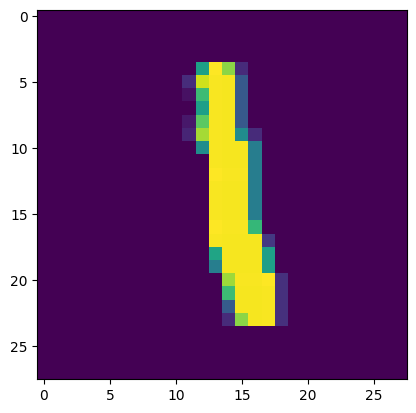

In [4]:
plt.imshow(X_train[6])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [10]:
model.fit(X_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 1ms/step - loss: 0.2915 - val_loss: 0.1661
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1317 - val_loss: 0.1211
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0920 - val_loss: 0.1047
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0681 - val_loss: 0.0936
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0514 - val_loss: 0.0898
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0417 - val_loss: 0.0860
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0318 - val_loss: 0.0890
Epoch 8/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0250 - val_loss: 0.0982
Epoch 9/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0208 - val_loss: 0.0984
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.018

In [11]:
y_prob= model.predict(X_test)

In [12]:
y_prob

array([[5.3029733e-08, 2.7256274e-11, 7.4922362e-09, ..., 9.9999583e-01,
        2.2195001e-09, 1.5877454e-06],
       [4.4557791e-15, 3.5799087e-06, 9.9999642e-01, ..., 2.4911981e-19,
        9.8269066e-11, 1.9026749e-16],
       [8.9484713e-09, 9.9943835e-01, 6.6856504e-05, ..., 1.5327525e-05,
        4.7860303e-04, 1.8400556e-07],
       ...,
       [6.0850190e-16, 1.9748404e-14, 3.0896380e-15, ..., 6.0576419e-09,
        1.2971333e-08, 1.4845947e-06],
       [5.8092798e-15, 3.9747237e-15, 2.3022250e-18, ..., 4.6319551e-13,
        4.5018297e-08, 1.1212288e-12],
       [3.7311779e-11, 1.9209652e-14, 2.9067922e-11, ..., 2.6295534e-17,
        2.6455851e-14, 1.9045418e-13]], dtype=float32)

In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9784

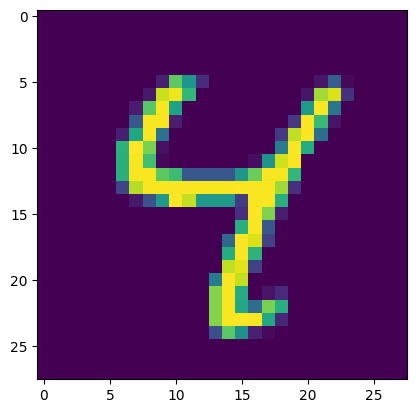

In [16]:
plt.imshow(X_test[6])

In [17]:
output = model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

In [18]:
print(output[0])

4
